**PROJECT INTRODUCTION AND GENERAL OVERVIEW**

MACHINE LEARNING
Machine Learning is a branch of artificial intelligence that enables computer systems to learn from data and perform specific tasks by discovering complex relationships, recognizing patterns, and making predictions about the future through data analysis and modeling. In our project, the focus is on predicting housing prices.

**Project Objectives:**
- Identify factors influencing housing prices and examine their relationships.
- Develop a machine learning model to model and predict these relationships.
- Evaluate the performance of the developed model and visualize the results.

**Machine Learning Technique Used:**
The machine learning technique used in the project is Ridge Regression. Ridge Regression is a regression method used to prevent overfitting by reducing the complexity of the model, particularly effective in high-dimensional datasets, and it shrinks the weights towards zero.

**Project Progression:**
- Firstly, a dataset containing various factors influencing housing prices was utilized.
- The dataset was examined, missing data was filled, and necessary preprocessing steps were taken.
- The dataset was split into training and testing sets.
- Ridge Regression was chosen as the machine learning model.
- Polynomial features were used to enhance the model's performance.
- Different polynomial degrees were experimented with to achieve the best results.
- Finally, the performance of the model was evaluated, and the relationship between actual and predicted values was visualized.

This project serves as an example of how machine learning techniques can be applied to real-world data. Additionally, it demonstrates the development of a model that can be used in various practical applications, such as predicting housing prices.

Also you can access this data from this link: https://drive.google.com/file/d/1PJLaGjvpS9I8bUQLig7qp3uk3BF4Fk4C/view?usp=sharing

In [27]:
# Libraries Imported
import numpy as np  # Importing NumPy for numerical computations
import pandas as pd  # Importing Pandas for data manipulation
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.pipeline import Pipeline  # For creating a pipeline of data processing steps
from sklearn.preprocessing import StandardScaler  # For standardizing features
from sklearn.preprocessing import PolynomialFeatures  # For generating polynomial features
from sklearn.linear_model import Ridge  # For Ridge Regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error  # For evaluating model performance
import matplotlib.pyplot as plt  # For data visualization



This part imports the necessary libraries for data manipulation, model creation, evaluation, and visualization.



In [28]:
# Load the dataset
df = pd.read_csv('housing.csv', sep=r'\s+', header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)
# Fill missing values with mean
df.fillna(df.mean(), inplace=True)


Here, the dataset is loaded from a CSV file, missing values represented as '?' are replaced with NaN, and the missing values are filled with the mean of each column.



In [29]:
# Splitting the target variable and predictor variables
y = df['MEDV']
X = df.drop('MEDV', axis=1)


The dataset is split into predictor variables (X) and the target variable (y).



In [30]:
# Train-Test Split
# Creating training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


The data is split into training and testing sets using the train_test_split function.



In [31]:
# Logarithmic Transformations
# Applying logarithmic transformations to features
X_train_log = np.log1p(X_train)
X_test_log = np.log1p(X_test)


Logarithmic transformations are applied to the features using the np.log1p function.



In [32]:
# Initializing variables to store the best results
best_rmse = float('inf')
best_degree = 0
best_mae = float('inf')
best_mse = float('inf')
best_y_pred = None


Variables are initialized to store the best RMSE, degree, MAE, MSE, and predicted values.



In [33]:
# Looping through different polynomial degrees to find the best result
for degree in range(1, 6):
    # Creating a Ridge regression model
    ridge_model = Ridge(alpha=0.1)
    # Creating a pipeline
    steps = [('scaler', StandardScaler()), ('poly', PolynomialFeatures(degree=degree)), ('model', ridge_model)]
    pipeline = Pipeline(steps)
    # Training the model and making predictions
    pipeline.fit(X_train_log, y_train)
    y_pred = pipeline.predict(X_test_log)
    # Evaluating the performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    # Updating the best values
    if rmse < best_rmse:
        best_rmse = rmse
        best_degree = degree
        best_mae = mae
        best_mse = mse
        best_y_pred = y_pred
# Printing the best results
print("Best RMSE:", best_rmse)
print("Best Degree:", best_degree)
print("Best MAE:", best_mae)
print("Best MSE:", best_mse)


Best RMSE: 3.505713611955166
Best Degree: 2
Best MAE: 2.3317282107573516
Best MSE: 12.290027929047737


This part of the code loops through different polynomial degrees, trains the Ridge regression model using a pipeline, evaluates its performance, and updates the best results.



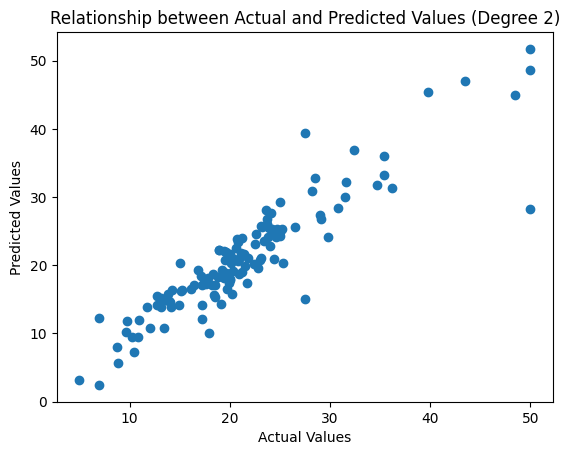

In [34]:
# Visualizing the relationship between actual and predicted values
plt.scatter(y_test, best_y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Relationship between Actual and Predicted Values (Degree {})".format(best_degree))
plt.show()


Finally, the relationship between actual and predicted values is visualized using a scatter plot.